In [1]:
import pandas as pd
import numpy as np
from Logistic import LogisticRegression
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning

In [4]:
df.drop("Loan_ID", axis=1, inplace=True)
# Checking the Missing Values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# Task1 deal with NULL rows, you can either choose to drop them or replace them with mean or other value 
data = (df.copy(deep=True)).dropna()
print(data.isnull().sum())
data

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
data.iloc[2]

Gender                       Male
Married                       Yes
Dependents                      0
Education            Not Graduate
Self_Employed                  No
ApplicantIncome              2583
CoapplicantIncome          2358.0
LoanAmount                  120.0
Loan_Amount_Term            360.0
Credit_History                1.0
Property_Area               Urban
Loan_Status                     Y
Name: 3, dtype: object

## Encode 

In [7]:
# Task2 deal with categorical features
# Tip df.Gender=df.Gender.map({'Male':1,'Female':0})
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Married =data.Married.map({'Yes':1,'No':0})
data.Dependents = data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
data.Education = data.Education.map({'Graduate':1,'Not Graduate':0})
data.Self_Employed = data.Self_Employed.map({'Yes':1,'No':0})
data.Loan_Status = data.Loan_Status.map({'Y':1,'N':0})
data = data.join(pd.get_dummies(data.Property_Area))
data.drop("Property_Area", axis=1, inplace=True)

data


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,1,0,0
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,1,1,0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,0,0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,0,0,1


## Data process

In [8]:
# Task3 split the dataset into X_train, X_test, y_train, y_test
# Optional: you can also use normalization
def normalize(data):
    min = np.min(data)
    max = np.max(data)
    return (data - min) / (max - min)
data.ApplicantIncome = normalize(data.ApplicantIncome)
data.CoapplicantIncome = normalize(data.CoapplicantIncome)
data.LoanAmount = normalize(data.LoanAmount)
data.Loan_Amount_Term = normalize(data.Loan_Amount_Term)

data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
1,1,1,1,1,0,0.054830,0.044567,0.201354,0.729730,1.0,0,1,0,0
2,1,1,0,1,1,0.035250,0.000000,0.096447,0.729730,1.0,1,0,0,1
3,1,1,0,0,0,0.030093,0.069687,0.187817,0.729730,1.0,1,0,0,1
4,1,0,0,1,0,0.072356,0.000000,0.223350,0.729730,1.0,1,0,0,1
5,1,1,2,1,1,0.065145,0.124006,0.436548,0.729730,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,0.034014,0.000000,0.104907,0.729730,1.0,1,1,0,0
610,1,1,3,1,0,0.048930,0.000000,0.052453,0.324324,1.0,1,1,0,0
611,1,1,1,1,0,0.097984,0.007093,0.412860,0.729730,1.0,1,0,0,1
612,1,1,2,1,0,0.091936,0.000000,0.301184,0.729730,1.0,1,0,0,1


In [9]:
def split_train_test(data, test_ratio):
    np.random.seed(46)
    shuffled_indices = np.random.permutation(len(data))  # 生成和原数据等长的无序索引
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train,test = split_train_test(data, 0.1)

In [10]:
names = data.columns
x_name = names.drop('Loan_Status')
X_train,X_test = train[x_name],test[x_name]
y_train,y_test = train['Loan_Status'],test['Loan_Status']

## Train

In [11]:
# Task4 train your model and plot the loss curve of training
# batchSize = len(X_train) #梯度下降方法是基于所有样本的
x = np.array(X_train)
y = np.array(y_train)
x1 = np.array(X_test)
one = np.ones(x1.shape[0])
x1 = np.c_[one,x1]
y1 = np.array(y_test)

LogitRegression = LogisticRegression()

In [12]:
theta, costs = LogitRegression.fit(x,y,lr=0.1)

第2000次
	Train Loss: 0.468 
用时0.078998秒
第4000次
	Train Loss: 0.466 
用时0.148096秒
第6000次
	Train Loss: 0.465 
用时0.217119秒
第8000次
	Train Loss: 0.465 
用时0.293116秒
第10000次
	Train Loss: 0.465 
用时0.366115秒
第12000次
	Train Loss: 0.465 
用时0.435113秒
第14000次
	Train Loss: 0.465 
用时0.506114秒
第16000次
	Train Loss: 0.465 
用时0.582115秒
第18000次
	Train Loss: 0.465 
用时0.656128秒
第20000次
	Train Loss: 0.465 
用时0.728116秒
第22000次
	Train Loss: 0.465 
用时0.800114秒
第24000次
	Train Loss: 0.465 
用时0.873204秒
第26000次
	Train Loss: 0.465 
用时0.945115秒
第28000次
	Train Loss: 0.465 
用时1.018123秒
第30000次
	Train Loss: 0.465 
用时1.091153秒
第32000次
	Train Loss: 0.465 
用时1.164135秒
第34000次
	Train Loss: 0.465 
用时1.247180秒
第36000次
	Train Loss: 0.465 
用时1.319191秒
第38000次
	Train Loss: 0.465 
用时1.393190秒
第40000次
	Train Loss: 0.465 
用时1.464191秒
第42000次
	Train Loss: 0.465 
用时1.536272秒
第44000次
	Train Loss: 0.465 
用时1.608271秒
第46000次
	Train Loss: 0.465 
用时1.680350秒
第48000次
	Train Loss: 0.465 
用时1.751336秒
第50000次
	Train Loss: 0.465 
用时1.820357秒
第520

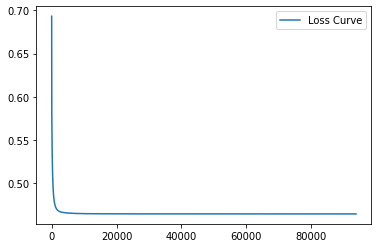

In [13]:
plt.plot(costs,label = "Loss Curve")
plt.legend()
plt.savefig("loss.pdf")
plt.show()

## Predict

In [14]:
pred = LogitRegression.predict(x1)
count_acc = 0
for i in range(len(y1)):
    if pred[i]>0.5:
        if y1[i] == 1:
            count_acc += 1
    else:
        if y1[i] == 0:
            count_acc += 1
acc = count_acc/len(y1)
acc

0.8541666666666666

In [15]:
# 换一个学习率
LogitRegression2 = LogisticRegression()
theta2, costs2 = LogitRegression2.fit(x,y,lr=0.1)
pred = LogitRegression.predict(x1)
count_acc = 0
for i in range(len(y1)):
    if pred[i]>0.5:
        if y1[i] == 1:
            count_acc += 1
    else:
        if y1[i] == 0:
            count_acc += 1
acc = count_acc/len(y1)
acc

第2000次
	Train Loss: 0.468 
用时0.077020秒
第4000次
	Train Loss: 0.466 
用时0.148000秒
第6000次
	Train Loss: 0.465 
用时0.223999秒
第8000次
	Train Loss: 0.465 
用时0.296016秒
第10000次
	Train Loss: 0.465 
用时0.368999秒
第12000次
	Train Loss: 0.465 
用时0.446013秒
第14000次
	Train Loss: 0.465 
用时0.516095秒
第16000次
	Train Loss: 0.465 
用时0.587999秒
第18000次
	Train Loss: 0.465 
用时0.659999秒
第20000次
	Train Loss: 0.465 
用时0.732000秒
第22000次
	Train Loss: 0.465 
用时0.806036秒
第24000次
	Train Loss: 0.465 
用时0.874999秒
第26000次
	Train Loss: 0.465 
用时0.950000秒
第28000次
	Train Loss: 0.465 
用时1.029999秒
第30000次
	Train Loss: 0.465 
用时1.103038秒
第32000次
	Train Loss: 0.465 
用时1.179002秒
第34000次
	Train Loss: 0.465 
用时1.252012秒
第36000次
	Train Loss: 0.465 
用时1.324096秒
第38000次
	Train Loss: 0.465 
用时1.398000秒
第40000次
	Train Loss: 0.465 
用时1.475015秒
第42000次
	Train Loss: 0.465 
用时1.550017秒
第44000次
	Train Loss: 0.465 
用时1.624000秒
第46000次
	Train Loss: 0.465 
用时1.697001秒
第48000次
	Train Loss: 0.465 
用时1.767018秒
第50000次
	Train Loss: 0.465 
用时1.839031秒
第520

0.8541666666666666